Ad Soyad: Zeynep DEMİREL   
Öğrenci Numarası: 21040101014   
Ders Adı: Veri Madenciliği (FET308)   
Öğretim Elemanı: SAJJAD NEMATZADEH MİANDOAB   
Üniversite: İstanbul Topkapı Üniversitesi   
Fakülte: Mühendislik Fakültesi   
Bölüm: Bilgisayar Mühendisliği   

Dataset Linki: https://www.kaggle.com/datasets/dragonduck/property-listings-in-kuala-lumpur                         
Dataset Açıklaması: Bu veri seti, Kuala Lumpur, Malezya'da satılık olan mülkleri içeren bir emlak ilanı web sitesinden elde edilmiş tablo verilerini içermektedir. Veri seti, her biri bir emlak listesine ait olan çeşitli öznitelikleri içerir. Bu öznitelikler arasında konum (Location), fiyat (Price), oda sayısı (Rooms), banyo sayısı (Bathrooms), araç park yeri sayısı (Car Parks), mülk türü (Property Type), alan büyüklüğü (Size), eşya durumu (Furnishing) gibi bilgiler bulunmaktadır. Bu veri seti, emlak pazarındaki çeşitli özelliklere sahip mülkleri içerdiği için, bu alanda analizler yapmak, fiyat tahminlemeleri gerçekleştirmek veya farklı özellikler arasındaki ilişkileri anlamak için kullanılabilir.

1. DATA DEFINITION ANALYSIS

1.1 Datasetin Genel İstatistiği, Datasetin Satır Sayısı, Sütun Sayısı ve Veri Türleri

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
import numpy as np
import re
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, mean_squared_error, r2_score
from scipy.stats import ttest_rel
from sklearn.metrics import mean_absolute_error

In [2]:
properties=pd.read_csv("data_kaggle.csv")

In [3]:
properties

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,"KLCC, Kuala Lumpur","RM 1,250,000",2+1,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
1,"Damansara Heights, Kuala Lumpur","RM 6,800,000",6,7.0,NaN,Bungalow,Land area : 6900 sq. ft.,Partly Furnished
2,"Dutamas, Kuala Lumpur","RM 1,030,000",3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
3,"Cheras, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Bukit Jalil, Kuala Lumpur","RM 900,000",4+1,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished
...,...,...,...,...,...,...,...,...
53878,"Bangsar, Kuala Lumpur","RM 5,100,000",5+1,4.0,NaN,Bungalow (Corner),Land area : 7168 sq. ft.,Fully Furnished
53879,"Bangsar, Kuala Lumpur","RM 5,000,000",5,4.0,NaN,Bungalow (Intermediate),Land area : 15000 sq. ft.,Unfurnished
53880,"Bangsar, Kuala Lumpur","RM 5,500,000",5+1,4.0,NaN,Bungalow (Intermediate),Land area : 7168 sq. ft.,Partly Furnished
53881,"Wangsa Maju, Kuala Lumpur","RM 480,000",3,2.0,NaN,Condominium (Intermediate),"Built-up : 1,150 sq. ft.",Unfurnished


In [4]:
#NaN (boş) değerlere sahip satırları kaldırır
properties.dropna(inplace=True)

In [5]:
print("Tablo Bilgisi:")
properties.info()

Tablo Bilgisi:
<class 'pandas.core.frame.DataFrame'>
Index: 31899 entries, 0 to 53882
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       31899 non-null  object 
 1   Price          31899 non-null  object 
 2   Rooms          31899 non-null  object 
 3   Bathrooms      31899 non-null  float64
 4   Car Parks      31899 non-null  float64
 5   Property Type  31899 non-null  object 
 6   Size           31899 non-null  object 
 7   Furnishing     31899 non-null  object 
dtypes: float64(2), object(6)
memory usage: 2.2+ MB


In [6]:
print("Tablonun Genel İstatistiği:")
print(properties.describe())

Tablonun Genel İstatistiği:
          Bathrooms     Car Parks
count  31899.000000  31899.000000
mean       2.936236      2.013449
std        1.532726      1.308361
min        1.000000      1.000000
25%        2.000000      1.000000
50%        2.000000      2.000000
75%        4.000000      2.000000
max       20.000000     30.000000


In [7]:
print("Tablonun Satır Sayısı:", properties.shape[0])
print("Tablonun Sütun Sayısı:", properties.shape[1])

Tablonun Satır Sayısı: 31899
Tablonun Sütun Sayısı: 8


In [8]:
print("Veri Tipleri:")
print(properties.dtypes)

Veri Tipleri:
Location          object
Price             object
Rooms             object
Bathrooms        float64
Car Parks        float64
Property Type     object
Size              object
Furnishing        object
dtype: object


1.2 Machine Learning'e Uygun Olmayan Sütunların Düzenlenmesi

In [9]:
# "Price" sütununu sayısal değere dönüştürme
properties["Price"] = properties["Price"].replace('[^\d.]', '', regex=True).astype(float)

# 'Size' sütununu düzenleme işlemi
def clean_and_multiply(x):
    if pd.notnull(x):
        # Eğer '1,335' gibi bir ifade varsa, ',' karakterini kaldır ve doğrudan sayıya dönüştür
        if ',' in str(x):
            return int(''.join(re.findall(r'\d', str(x))))
        
        # Eğer '25x75' veya '25*75' gibi bir ifade varsa, 'x' veya '*' karakterini kullanarak çarpma işlemi yapar
        elif 'x' in str(x) or '*' in str(x):
            parts = re.findall(r'\d+', str(x))
            if len(parts) == 2:
                return int(parts[0]) * int(parts[1])
        
        # Eğer 'Land area' ifadesi varsa, sadece sayısal değeri alır
        elif 'Land area' in str(x):
            numbers = re.findall(r'\d+', str(x))
            if numbers:
                return int(''.join(numbers))
        
        # Eğer 'Built-up' ifadesi varsa, sadece sayısal değeri alır
        elif 'Built-up' in str(x):
            numbers = re.findall(r'\d+', str(x))
            if numbers:
                return int(''.join(numbers))

    return x

# 'Size' sütununu düzenler ve veritipini int veya float olarak değiştirir
properties['Size'] = pd.to_numeric(properties['Size'].apply(clean_and_multiply), errors='coerce')

# 'Rooms' sütunundaki '4+1' gibi kombinasyonları ayrı değişkenlere alıp toplamaya çevirme
properties[['Room1', 'Room2']] = properties['Rooms'].astype(str).str.split('+', expand=True)
properties['Rooms'] = pd.to_numeric(properties[['Room1', 'Room2']].stack(), errors='coerce').groupby(level=0).sum()

# Gereksiz sütunları düşürme
properties = properties.drop(['Room1', 'Room2'], axis=1)

# Sayısal sütunlardaki NaN değerlerini ortalamayla doldurur
numeric_properties = properties.select_dtypes(include=[np.number])
imputer = SimpleImputer(strategy='mean')
properties_imputed = pd.DataFrame(imputer.fit_transform(numeric_properties), columns=numeric_properties.columns)

# Label Encoding'i 'Location', 'Property Type', ve 'Furnishing' sütununa uygular
label_encoder = LabelEncoder()
properties_imputed['Location_encoded'] = label_encoder.fit_transform(properties['Location'])
properties_imputed['Property_Type_encoded'] = label_encoder.fit_transform(properties['Property Type'])
properties_imputed['Furnishing_encoded'] = label_encoder.fit_transform(properties['Furnishing'])

# One-Hot Encoding'i 'Location', 'Property Type', ve 'Furnishing' sütununa uygular
location_dummies = pd.get_dummies(properties['Location'], prefix='Location', drop_first=True)
property_type_dummies = pd.get_dummies(properties['Property Type'], prefix='Property_Type', drop_first=True)
furnishing_dummies = pd.get_dummies(properties['Furnishing'], prefix='Furnishing', drop_first=True)

# Dataframe'e yeni sütun ekler
properties = pd.concat([properties, location_dummies, property_type_dummies, furnishing_dummies], axis=1)

# Orijinal sütunları siler
properties = properties.drop(['Location', 'Property Type', 'Furnishing'], axis=1)

print(properties)

           Price  Rooms  Bathrooms  Car Parks    Size  \
0      1250000.0    3.0        3.0        2.0  1335.0   
2      1030000.0    3.0        4.0        2.0  1875.0   
4       900000.0    5.0        3.0        2.0  1513.0   
5      5350000.0    6.0        5.0        4.0  7200.0   
7      2600000.0    5.0        4.0        4.0  3600.0   
...          ...    ...        ...        ...     ...   
53862   750000.0    3.0        2.0        1.0   915.0   
53868  1400000.0    4.0        3.0        2.0  1544.0   
53869   880000.0    1.0        1.0        1.0   650.0   
53876  2700000.0    6.0        6.0        3.0  3973.0   
53882   540000.0    4.0        2.0        3.0  1313.0   

       Location_Ampang, Kuala Lumpur  \
0                              False   
2                              False   
4                              False   
5                              False   
7                              False   
...                              ...   
53862                          Fals

In [10]:
print("Veri Tiplerinin Düzenlenmiş Hali:")
print(properties.dtypes)

Veri Tiplerinin Düzenlenmiş Hali:
Price                                     float64
Rooms                                     float64
Bathrooms                                 float64
Car Parks                                 float64
Size                                      float64
                                           ...   
Property_Type_Townhouse (EndLot)             bool
Property_Type_Townhouse (Intermediate)       bool
Furnishing_Partly Furnished                  bool
Furnishing_Unfurnished                       bool
Furnishing_Unknown                           bool
Length: 176, dtype: object


1.3 Verilerin Bir Kısmının Görselleştirilmesi

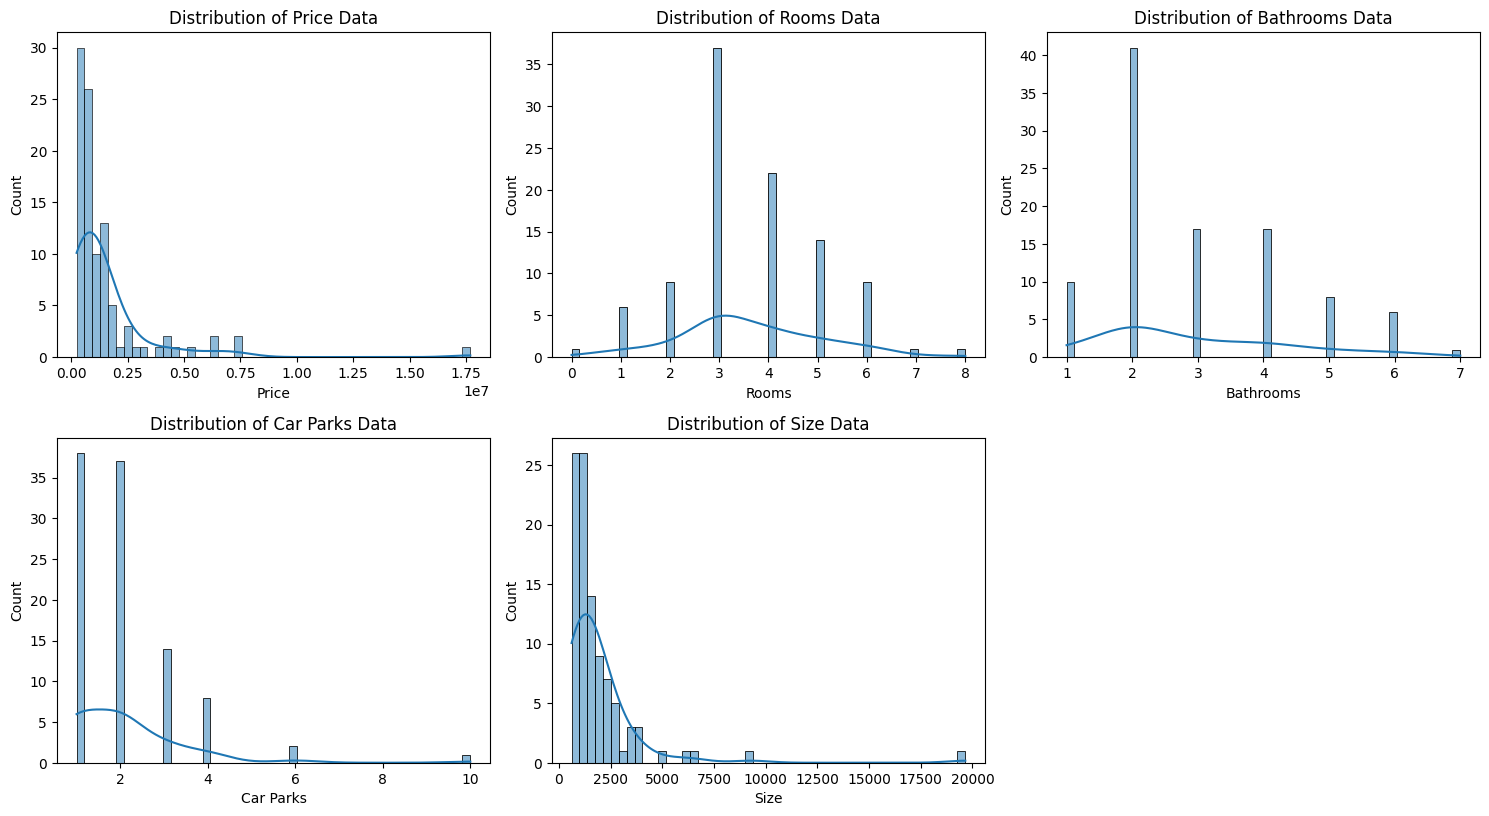

In [11]:
# Sayısal olmayan sütunları filtreler
numeric_columns = properties.select_dtypes(include=['float64', 'int64']).columns

# Yalnızca sayısal sütunları içeren yeni DataFrame'i oluşturur
df_numeric = properties[numeric_columns]

# 30000 satır bellek tükenmesine sebebiyet verdiği için verilerin bir kısmını ele aldım
df_numeric_sampled = df_numeric.sample(n=100, random_state=42)

# Yeni DataFrame üzerinde histogram çizimi
plt.figure(figsize=(15, 20))
for i, col in enumerate(df_numeric_sampled.columns, 1):
    plt.subplot(5, 3, i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df_numeric_sampled[col], kde=True, bins=50)
    plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Korelasyon Isı Haritası')

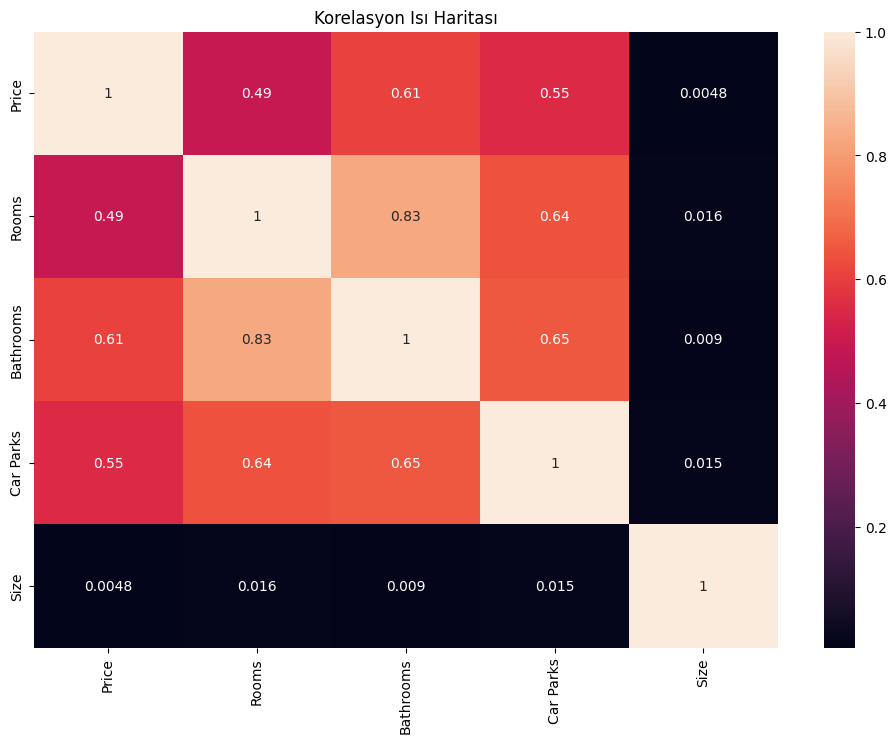

In [12]:
# Sayısal olmayan sütunları filtreler
numeric_columns2 = properties.select_dtypes(include=['float64', 'int64']).columns

# Yalnızca sayısal sütunları içeren yeni DataFrame'i oluşturur
df_numeric2 = properties[numeric_columns2]

df_numeric_sampled2 = df_numeric2.sample(n=31899, random_state=42)

#Isı haritası çizimi
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric_sampled2.corr(), annot=True)
plt.xticks(rotation=90)
plt.title("Korelasyon Isı Haritası")

2. MACHINE LEARNING AND EVALUATION

2.1 Problemi Tanımı, Kullanılan Yöntem ve Tahmin Etmek istenilen Öznitelik   
   
        Problem: Konut Fiyatlarını Tahmin Etmek
        Kullanılacak Yöntem: Regression
        Hedef Sütunu (Target): "Price"

2.2 Sklearn'den 2 Adet Algoritma Seçimi

        Kullanılacak Algoritmalar: LinearRegression, RandomForestRegressor, GradientBoostingRegressor

2.3 Modelin Eğitilmesi

        10 kere tekrarlanan döngü içinde:

        2.3.1: Verilerin %80'i TrainSet, geri kalan %20'si TestSet olarak ayrılmıştır.
        2.3.2: Her algoritma için model eğitimi yapılmıştır.
        2.3.3: TestSet üzerinde tahmin yaparak MSE, R2, MAE,RMSE metrikleri bir listede kaydedilmiştir.


2.4 Algoritma Metriklerinin Test Edilmesi

        T-Test kullanılarak iki algoritmanın metrikleri ayrı ayrı test edilmiştir. LinearRegression ve RandomForestRegressor için T-test yapılmıştır.

2.5 Algoritma Metriklerinin Karşılaştırılması

        Kullanılan 2 algoritmadan gelen metrikler için hangisinin daha iyi olduğu değerlendirilmiştir. Bu değerlendirme, p-value değerlerine dayanarak yapılmıştır. Eğer p-value < 0.05 ise, o metrik açısından bir algoritmanın diğerinden daha iyi olduğu kabul edilmiştir. Bu kriterlere göre LinearRegression'ın RandomForestRegressor'a göre istatistiksel olarak daha iyi olduğu sonucuna varılmıştır.

In [13]:
# Hedef sütun tanımlandı
target_column = "Price"

# Verisetini (X) ve (y) olmak üzere böldük
features = properties_imputed.drop(target_column, axis=1)
X = features
y_column = ["Rooms", "Bathrooms", "Car Parks", "Size"] 
y = properties_imputed[y_column]

# Algoritmalar tanımlandı
algorithms = [LinearRegression(), RandomForestRegressor()]

# Her algoritma için metrik sonuçların saklanacağı dictionary
metric_results = {'LinearRegression': {'mse': [], 'r2': [], 'mae': [], 'rmse': []},
                  'RandomForestRegressor': {'mse': [], 'r2': [], 'mae': [], 'rmse': []}}

# LinearRegression ve RandomForestRegressor algoritmaları için tanımlanmış döngü
for algo in algorithms[:2]: 
    print(f"\nAlgoritma: {algo.__class__.__name__}")
    for _ in range(10):
        # Veriler TrainSet ve TestSet'e bölündü
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

        # Modelin eğitilmesi
        model = algo
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        # Algoritmalar için regresyon metrikleri
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mse)

        metric_results[algo.__class__.__name__]['mse'].append(mse)
        metric_results[algo.__class__.__name__]['r2'].append(r2)
        metric_results[algo.__class__.__name__]['mae'].append(mae)
        metric_results[algo.__class__.__name__]['rmse'].append(rmse)

        print(f"Mean Squared Error: {mse}, R^2 Score: {r2}, MAE: {mae}, RMSE: {rmse}")

# Linear Regression ve RandomForestRegressor için T-Test
t_stat_mse, p_value_mse = ttest_rel(metric_results['LinearRegression']['mse'], metric_results['RandomForestRegressor']['mse'])
t_stat_r2, p_value_r2 = ttest_rel(metric_results['LinearRegression']['r2'], metric_results['RandomForestRegressor']['r2'])
t_stat_mae, p_value_mae = ttest_rel(metric_results['LinearRegression']['mae'], metric_results['RandomForestRegressor']['mae'])
t_stat_rmse, p_value_rmse = ttest_rel(metric_results['LinearRegression']['rmse'], metric_results['RandomForestRegressor']['rmse'])

print("\nLinear Regression ve RandomForestRegressor için T-Test Sonuçları:")
print(f"Mean Squared Error: t-statistic = {t_stat_mse}, p-value = {p_value_mse}")
print(f"R^2 Score: t-statistic = {t_stat_r2}, p-value = {p_value_r2}")
print(f"MAE: t-statistic = {t_stat_mae}, p-value = {p_value_mae}")
print(f"RMSE: t-statistic = {t_stat_rmse}, p-value = {p_value_rmse}")

# İki algoritma arasındaki karşılaştırmalar
alpha = 0.05  # Anlamlılık düzeyi
better_performance = {}  # Hangi algoritmanın daha iyi performans gösterdiğini belirlemek için

if p_value_mse < alpha:
    better_performance['MSE'] = 'Linear Regression' if np.mean(metric_results['LinearRegression']['mse']) < np.mean(metric_results['RandomForestRegressor']['mse']) else 'RandomForestRegressor'

if p_value_r2 < alpha:
    better_performance['R2'] = 'Linear Regression' if np.mean(metric_results['LinearRegression']['r2']) > np.mean(metric_results['RandomForestRegressor']['r2']) else 'RandomForestRegressor'

if p_value_mae < alpha:
    better_performance['MAE'] = 'Linear Regression' if np.mean(metric_results['LinearRegression']['mae']) < np.mean(metric_results['RandomForestRegressor']['mae']) else 'RandomForestRegressor'

if p_value_rmse < alpha:
    better_performance['RMSE'] = 'Linear Regression' if np.mean(metric_results['LinearRegression']['rmse']) < np.mean(metric_results['RandomForestRegressor']['rmse']) else 'RandomForestRegressor'

print("\nPerformans Karşılaştırması:")
for metric, algorithm in better_performance.items():
    print(f"{metric}: {algorithm} performansı daha iyi.")



Algoritma: LinearRegression
Mean Squared Error: 1.581493384655228e-19, R^2 Score: 1.0, MAE: 3.275066052895572e-11, RMSE: 3.9767994476151647e-10
Mean Squared Error: 1.581493384655228e-19, R^2 Score: 1.0, MAE: 3.275066052895572e-11, RMSE: 3.9767994476151647e-10
Mean Squared Error: 1.581493384655228e-19, R^2 Score: 1.0, MAE: 3.275066052895572e-11, RMSE: 3.9767994476151647e-10
Mean Squared Error: 1.581493384655228e-19, R^2 Score: 1.0, MAE: 3.275066052895572e-11, RMSE: 3.9767994476151647e-10
Mean Squared Error: 1.581493384655228e-19, R^2 Score: 1.0, MAE: 3.275066052895572e-11, RMSE: 3.9767994476151647e-10
Mean Squared Error: 1.581493384655228e-19, R^2 Score: 1.0, MAE: 3.275066052895572e-11, RMSE: 3.9767994476151647e-10
Mean Squared Error: 1.581493384655228e-19, R^2 Score: 1.0, MAE: 3.275066052895572e-11, RMSE: 3.9767994476151647e-10
Mean Squared Error: 1.581493384655228e-19, R^2 Score: 1.0, MAE: 3.275066052895572e-11, RMSE: 3.9767994476151647e-10
Mean Squared Error: 1.581493384655228e-19, 